In [1]:
import pandas as pd
import ast
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import string

In [99]:
df = pd.read_csv('captions_df - sample_captions_df.csv',encoding="utf-8",na_values='NaN')

In [100]:
df

,Unnamed: 0,username,captions,is_fake,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,getlostsg,"[""Finally filming with @outcastssg !! Faster s...",0,NaN,NaN,NaN
1,1,ryanxgo,"['For sale', 'thecaser.co x Ryan Tan\nA collab...",0,NaN,NaN,NaN
2,2,sgagsg,"['remember to keep ur fam & friends close, but...",0,NaN,NaN,NaN
3,3,mgagmy,"[""Where else can you find such a good-looking ...",0,NaN,NaN,NaN
4,4,dargoyaki,['Highlights of this film roll:\n\n#1 new clie...,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
245,245,copy ai,"[""I'm excited to be back in school and I love ...",1,NaN,NaN,NaN
246,246,copy ai,"[""Pets are cute and good companions, who don't...",1,NaN,NaN,NaN
247,247,copy ai,"['Play hard, play fair, and have fun. Thatâ€™s...",1,NaN,NaN,NaN
248,248,copy ai,['If you are looking for some good exercise an...,1,NaN,NaN,NaN


In [101]:
def perfectEval(anonstring):
    try:
        ev = ast.literal_eval(anonstring)
        return ev
    except ValueError:
        return []

In [102]:
#Processing dataframe
y = df['captions'].apply(lambda x: perfectEval(x))  
y = y.apply(lambda cap_list: [cap for cap in cap_list if cap is not None])
df['captions'] = y
df = df.drop(columns = ["Unnamed: 4","Unnamed: 5","Unnamed: 6"])

In [6]:
#pip install --upgrade language-check

In [103]:
captions = df.copy()

In [8]:
import enchant
import language_tool_python

In [104]:
tool = language_tool_python.LanguageTool('en-US') 
captions["emoji"] = ""
captions["mentions"] = ""
captions["hashtags"] = ""
captions["url"] = ""
captions = captions.explode('captions').reset_index()
captions['captions'][4]
captions['clean_captions'] = ''
captions["wrong spelling ratio"] = ""
captions["grammer"] = ""


In [10]:
d = enchant.Dict("en_US")

In [105]:
import re
import pandas as pd
from nltk.corpus import stopwords

emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'
stop_words = set(stopwords.words('english'))
for word in range(len(captions)):
    cap = captions["captions"][word]
    if cap is None:
        cap = "None"
    if type(cap) == float:
        cap = "None"
    word_list = cap.split(' ')
    word_list2 = [re.sub('[0-9]', ' ', i) for i in word_list]
    word_list3 = [re.sub("\d*\.\d+", " ", i) for i in word_list2]
    word_list4 = [str(i).replace('\n', ' ') for i in word_list3]
    word_list5 = [str(i).replace('\\n\\n', ' ') for i in word_list4]
    word_list6 = [str(i).replace('\\n', ' ') for i in word_list5]
    word_list7 = [str(i).replace('\n\n', ' ') for i in word_list6]
    regex = "#(\w+)"
    hashtag_list = re.findall(regex, cap)
    for character in string.punctuation:
        word_list7 = [str(i).replace(character, '') for i in word_list7]
    hashtag_list_lower = [item.lower() for item in hashtag_list]
    new_caption = " ".join(word_list7)
    ls = new_caption.split(' ')
    mention_list = re.findall("@(\w+)",cap)
    emojis = re.findall(emoji_regexp,cap)
    spelling = 0

    for i in ls.copy():
        if i.startswith('#'):
            ls.remove(i)
        elif i.startswith('@'):
            ls.remove(i)
        elif i in mention_list:
            ls.remove(i)
        elif i in stop_words:
            ls.remove(i)
        elif i in emojis:
            ls.remove(i)
    new_caption = " ".join(ls)
    captions["clean_captions"][word] = new_caption.lower()
    captions["hashtags"][word] = hashtag_list
    captions["mentions"][word] = mention_list
    captions["emoji"][word] = emojis
captions[:200]

C:\Users\Lian\AppData\Local\Temp/ipykernel_34744/3636272345.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captions["clean_captions"][word] = new_caption.lower()
C:\Users\Lian\AppData\Local\Temp/ipykernel_34744/3636272345.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captions["hashtags"][word] = hashtag_list
C:\Users\Lian\AppData\Local\Temp/ipykernel_34744/3636272345.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap

,index,Unnamed: 0,username,captions,is_fake,emoji,mentions,hashtags,url,clean_captions,wrong spelling ratio,grammer
0,0,0,getlostsg,Finally filming with @outcastssg !! Faster say...,0,"[👀, 👆, 🏻]","[outcastssg, outcastssg]",[],,finally filming faster say yall think win ke...,,
1,0,0,getlostsg,"Totally did not push back a post, just because...",0,"[👀, 😍]",[],[],,totally push back post missed upload time👀 tot...,,
2,0,0,getlostsg,Tag a friend who always needs to break the yol...,0,"[🍳, 😖]",[],[],,tag friend always needs break yolk camera thi...,,
3,0,0,getlostsg,Rate the transformation of this shophouse outt...,0,[💖],[hanniwongs],[],,rate transformation shophouse outta ⭐️⭐️⭐️⭐️⭐️...,,
4,0,0,getlostsg,"for the first timer ever in @getlostsg , one o...",0,[],[getlostsg],[],,first timer ever one crew paid meal guesses🧐 ...,,
...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,3,mgagmy,Got so many koala ady at home,0,[],[],[],,got many koala ady home,,
196,3,3,mgagmy,Adam Levine leaked dm,0,[],[],[],,adam levine leaked dm,,
197,3,3,mgagmy,Suka sgt klau cegu seni suruh bawa bendi,0,[],[],[],,suka sgt klau cegu seni suruh bawa bendi,,
198,3,3,mgagmy,Which one are you guys? \n\nSatisfy your pizza...,0,[],[],[],,which one guys satisfy pizza craving corntoz...,,


In [106]:
#Removing non english characters and emojis
captions['clean_captions'] = captions['clean_captions'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [152]:
#For finding grammer
for word in range(len(captions)):
    cap = captions["clean_captions"][word]
    if tool.check(cap) != "":
        grammer = 1
    else:
        grammer = 0
    ls = cap.split(' ')
    spelling = 0
    words = 0
    for l in ls:
        words +=1
        if l!= "" and d.check(l) == False:
            spelling += 1
    captions["wrong spelling ratio"][word] = spelling/words
    captions["grammer"][word] = grammer
captions[:200]

C:\Users\Lian\AppData\Local\Temp/ipykernel_34744/1459091046.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captions["wrong spelling ratio"][word] = spelling/words
C:\Users\Lian\AppData\Local\Temp/ipykernel_34744/1459091046.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captions["grammer"][word] = grammer


,index,Unnamed: 0,username,captions,is_fake,emoji,mentions,hashtags,url,clean_captions,wrong spelling ratio,grammer,caption_present
0,0,0,getlostsg,Finally filming with @outcastssg !! Faster say...,0,"[👀, 👆, 🏻]","[outcastssg, outcastssg]",[],,finally filming faster say yall think win ke...,0.068966,1,1
1,0,0,getlostsg,"Totally did not push back a post, just because...",0,"[👀, 😍]",[],[],,totally push back post missed upload time tota...,0.173913,1,1
2,0,0,getlostsg,Tag a friend who always needs to break the yol...,0,"[🍳, 😖]",[],[],,tag friend always needs break yolk camera thi...,0.0625,1,1
3,0,0,getlostsg,Rate the transformation of this shophouse outt...,0,[💖],[hanniwongs],[],,rate transformation shophouse outta stars ...,0.041667,1,1
4,0,0,getlostsg,"for the first timer ever in @getlostsg , one o...",0,[],[getlostsg],[],,first timer ever one crew paid meal guesses ...,0.0625,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,3,mgagmy,Got so many koala ady at home,0,[],[],[],,got many koala ady home,0.2,1,1
196,3,3,mgagmy,Adam Levine leaked dm,0,[],[],[],,adam levine leaked dm,0.5,1,1
197,3,3,mgagmy,Suka sgt klau cegu seni suruh bawa bendi,0,[],[],[],,suka sgt klau cegu seni suruh bawa bendi,1.0,1,1
198,3,3,mgagmy,Which one are you guys? \n\nSatisfy your pizza...,0,[],[],[],,which one guys satisfy pizza craving corntoz...,0.142857,1,1


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
captions

,index,Unnamed: 0,username,captions,is_fake,emoji,mentions,hashtags,url,clean_captions,wrong spelling ratio,grammer,caption_present
0,0,0,getlostsg,Finally filming with @outcastssg !! Faster say...,0,"[👀, 👆, 🏻]","[outcastssg, outcastssg]",[],,finally filming faster say yall think win ke...,0.068966,1,1
1,0,0,getlostsg,"Totally did not push back a post, just because...",0,"[👀, 😍]",[],[],,totally push back post missed upload time tota...,0.173913,1,1
2,0,0,getlostsg,Tag a friend who always needs to break the yol...,0,"[🍳, 😖]",[],[],,tag friend always needs break yolk camera thi...,0.0625,1,1
3,0,0,getlostsg,Rate the transformation of this shophouse outt...,0,[💖],[hanniwongs],[],,rate transformation shophouse outta stars ...,0.041667,1,1
4,0,0,getlostsg,"for the first timer ever in @getlostsg , one o...",0,[],[getlostsg],[],,first timer ever one crew paid meal guesses ...,0.0625,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,249,249,copy ai,I don't think I've ever seen anyone wear one o...,1,[],[],[],,i dont think ive ever seen anyone wear one out...,0.133333,1,1
9419,249,249,copy ai,It's a good day to shop.,1,[],[],[],,its good day shop,0.0,1,1
9420,249,249,copy ai,I wore this to go shopping and I couldn't have...,1,[],[],[],,i wore go shopping i couldnt happier results,0.125,1,1
9421,249,249,copy ai,"I wore this to go shopping, it's a perfect out...",1,[],[],[],,i wore go shopping perfect outfit days week,0.0,1,1


In [108]:
captions["caption_present"] = np.where(captions['clean_captions'] == "none", 0,1)

In [109]:
captions[captions['is_fake'].isnull()]

,index,Unnamed: 0,username,captions,is_fake,emoji,mentions,hashtags,url,clean_captions,wrong spelling ratio,grammer,caption_present


In [110]:
human = captions[captions["is_fake"] == 0]
human

,index,Unnamed: 0,username,captions,is_fake,emoji,mentions,hashtags,url,clean_captions,wrong spelling ratio,grammer,caption_present
0,0,0,getlostsg,Finally filming with @outcastssg !! Faster say...,0,"[👀, 👆, 🏻]","[outcastssg, outcastssg]",[],,finally filming faster say yall think win ke...,,,1
1,0,0,getlostsg,"Totally did not push back a post, just because...",0,"[👀, 😍]",[],[],,totally push back post missed upload time tota...,,,1
2,0,0,getlostsg,Tag a friend who always needs to break the yol...,0,"[🍳, 😖]",[],[],,tag friend always needs break yolk camera thi...,,,1
3,0,0,getlostsg,Rate the transformation of this shophouse outt...,0,[💖],[hanniwongs],[],,rate transformation shophouse outta stars ...,,,1
4,0,0,getlostsg,"for the first timer ever in @getlostsg , one o...",0,[],[getlostsg],[],,first timer ever one crew paid meal guesses ...,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,240,240,xuanstummy,📍 The Better Half \n\nMissing this place a lot...,0,"[📍, ❤, ❤]",[],[],,the better half missing place lot i absolute...,,,1
8969,240,240,xuanstummy,📍 Poke Theory\n\n#xuanfavs\n\nFinally tried Po...,0,"[📍, 😚]",[],[xuanfavs],,poke theory xuanfavs finally tried poke theo...,,,1
8970,240,240,xuanstummy,📍 Chef Choo's Signature\n\nHeard about this pl...,0,"[📍, 💗, 😳, ✨, ✨]","[kitchwen, kitchwen]",[xuanfavs],,chef choos signature heard place serving qual...,,,1
8971,240,240,xuanstummy,Matcha mornings has recently been looking supe...,0,"[❤, ❤, ❤]","[naokimatcha, naokimatcha]",[],,matcha mornings recently looking super pretty ...,,,1


In [111]:
bots = captions[captions["is_fake"] == 1]
bots

,index,Unnamed: 0,username,captions,is_fake,emoji,mentions,hashtags,url,clean_captions,wrong spelling ratio,grammer,caption_present
585,12,12,a.a.ghasami20,NaN,1,[],[],[],,none,,,0
586,13,13,i used a caption generator to generate,Don't let price tags keep you from having the ...,1,[],[],[],,dont let price tags keep wardrobe want we offe...,,,1
587,13,13,i used a caption generator to generate,The perfect shirt for any casual occasion. Thi...,1,[],[],[],,the perfect shirt casual occasion this shirt p...,,,1
588,13,13,i used a caption generator to generate,Get more bang for your buck with our affordabl...,1,[],[],[],,get bang buck affordable products,,,1
589,13,13,i used a caption generator to generate,"Easy, Breezy, and Affordable Dresses for Any O...",1,[],[],[],,easy breezy affordable dresses any occassion,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,249,249,copy ai,I don't think I've ever seen anyone wear one o...,1,[],[],[],,i dont think ive ever seen anyone wear one out...,,,1
9419,249,249,copy ai,It's a good day to shop.,1,[],[],[],,its good day shop,,,1
9420,249,249,copy ai,I wore this to go shopping and I couldn't have...,1,[],[],[],,i wore go shopping i couldnt happier results,,,1
9421,249,249,copy ai,"I wore this to go shopping, it's a perfect out...",1,[],[],[],,i wore go shopping perfect outfit days week,,,1


1    1484
0      15
Name: caption_present, dtype: int64


<AxesSubplot:title={'center':'Caption present for bots'}>

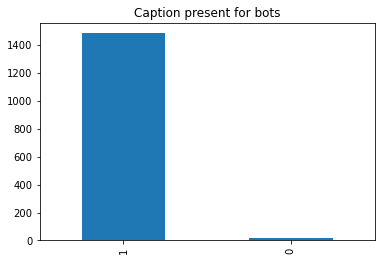

In [112]:
print(bots['caption_present'].value_counts())
plt.title("Caption present for bots")
bots["caption_present"].value_counts().plot(kind="bar")

1    7924
Name: caption_present, dtype: int64


<AxesSubplot:title={'center':'Caption present for humans'}>

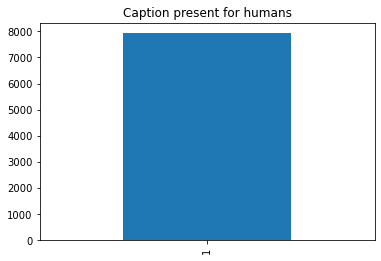

In [113]:
print(human['caption_present'].value_counts())
plt.title("Caption present for humans")
human["caption_present"].value_counts().plot(kind="bar")

<AxesSubplot:title={'center':'type of user'}, ylabel='is_fake'>

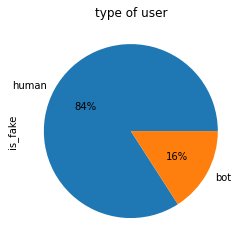

In [114]:
plt.title("type of user")
captions['is_fake'].value_counts().plot(kind="pie",labels=['human','bot'],autopct='%1.0f%%')

In [115]:
human['grammer'].describe()

count     7924
unique       1
top           
freq      7924
Name: grammer, dtype: object

In [116]:
bots['grammer'].describe()

count     1499
unique       1
top           
freq      1499
Name: grammer, dtype: object

In [117]:
captions['wrong spelling ratio'].max()

''

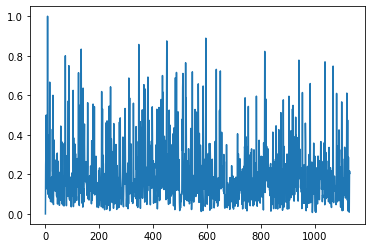

In [60]:
plt.plot(human['wrong spelling ratio'].value_counts().index)

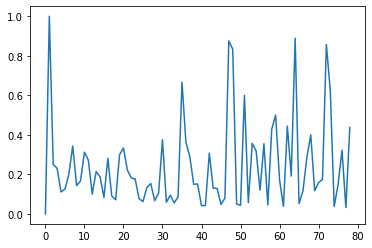

In [61]:
plt.plot(bots['wrong spelling ratio'].value_counts().index)

In [69]:
print("bots average wrong spelling ratio: ",bots['wrong spelling ratio'].mean())
print("human average wrong spelling ratio: ",human['wrong spelling ratio'].mean())

bots average wrong spelling ratio:  0.24073218454338693
human average wrong spelling ratio:  0.16401931023641916


In [118]:
df = pd.DataFrame(columns=["is_fake","text"])

In [119]:
df["is_fake"] = captions["is_fake"]
df["text"] = captions["clean_captions"]
df

,is_fake,text
0,0,finally filming faster say yall think win ke...
1,0,totally push back post missed upload time tota...
2,0,tag friend always needs break yolk camera thi...
3,0,rate transformation shophouse outta stars ...
4,0,first timer ever one crew paid meal guesses ...
...,...,...
9418,1,i dont think ive ever seen anyone wear one out...
9419,1,its good day shop
9420,1,i wore go shopping i couldnt happier results
9421,1,i wore go shopping perfect outfit days week


In [120]:
df.dropna()

,is_fake,text
0,0,finally filming faster say yall think win ke...
1,0,totally push back post missed upload time tota...
2,0,tag friend always needs break yolk camera thi...
3,0,rate transformation shophouse outta stars ...
4,0,first timer ever one crew paid meal guesses ...
...,...,...
9418,1,i dont think ive ever seen anyone wear one out...
9419,1,its good day shop
9420,1,i wore go shopping i couldnt happier results
9421,1,i wore go shopping perfect outfit days week


In [121]:
df["length"] = df['text'].apply(lambda x: len(x))

In [122]:
df["length"].describe()

count    9423.000000
mean      156.710071
std       231.178344
min         0.000000
25%        23.000000
50%        66.000000
75%       180.000000
max      1668.000000
Name: length, dtype: float64

In [19]:
df["length"]

0       155
1       140
2        94
3       126
4        76
       ... 
9418     65
9419     17
9420     44
9421     43
9422     25
Name: length, Length: 9423, dtype: int64

In [20]:
from nltk.tokenize import word_tokenize
from keras.preprocessing import text
from keras.utils import pad_sequences 
from nltk.stem import PorterStemmer

In [123]:
df['token'] = df['text'].apply(lambda x: word_tokenize(x))

In [124]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

for i in range(len(df)):
    words = df['token'][i]
    cleaned = []
    for w in words.copy():
        word = lemmatizer.lemmatize(w)
        word = ps.stem(word)
        cleaned.append(word)
    df["token"][i] = cleaned
df

C:\Users\Lian\AppData\Local\Temp/ipykernel_34744/606414245.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["token"][i] = cleaned


,is_fake,text,length,token
0,0,finally filming faster say yall think win ke...,155,"[final, film, faster, say, yall, think, win, k..."
1,0,totally push back post missed upload time tota...,140,"[total, push, back, post, miss, upload, time, ..."
2,0,tag friend always needs break yolk camera thi...,94,"[tag, friend, alway, need, break, yolk, camera..."
3,0,rate transformation shophouse outta stars ...,126,"[rate, transform, shophous, outta, star, thank..."
4,0,first timer ever one crew paid meal guesses ...,76,"[first, timer, ever, one, crew, paid, meal, gu..."
...,...,...,...,...
9418,1,i dont think ive ever seen anyone wear one out...,65,"[i, dont, think, ive, ever, seen, anyon, wear,..."
9419,1,its good day shop,17,"[it, good, day, shop]"
9420,1,i wore go shopping i couldnt happier results,44,"[i, wore, go, shop, i, couldnt, happier, result]"
9421,1,i wore go shopping perfect outfit days week,43,"[i, wore, go, shop, perfect, outfit, day, week]"


In [125]:
df["length_of_token"] = df['token'].apply(lambda x: len(x))
df["length_of_token"].describe()

count    9423.000000
mean       22.275814
std        33.094142
min         0.000000
25%         4.000000
50%         9.000000
75%        26.000000
max       253.000000
Name: length_of_token, dtype: float64

In [126]:

import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [127]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()


In [128]:
sequnce_length = df['length_of_token'].max()
max_features = 10000
maxlen = 300

In [131]:
tokenizer = text.Tokenizer(num_words=max_features, oov_token='<unw>', filters=' ')
tokenizer.fit_on_texts(df['token'].values)
X = tokenizer.texts_to_sequences(df['token'].values)
X = pad_sequences(X,sequnce_length)
y = df['is_fake'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3)

In [132]:
print('Found %s word vectors.' % len(embeddings_index))
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 400000 word vectors.
Found 19346 unique tokens.


In [133]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 100

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

10001


In [134]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text
from keras.utils import pad_sequences 
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
from tensorflow.keras.layers import Bidirectional, LSTM

In [135]:
model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length = sequnce_length,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 253, 100)          1000100   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 253, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_8 (Bidirectio  (None, 253, 128)         84480     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 253, 64)          41216     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 253, 64)           0         
                                                      

In [136]:
batch_size = 64
history = model.fit(X_train, y_train, epochs=3, verbose=1,batch_size = batch_size,validation_split=0.1)

Epoch 1/3
93/93 [==============================] - 77s 764ms/step - loss: 0.2854 - accuracy: 0.1572 - val_loss: 0.1832 - val_accuracy: 0.1758
Epoch 2/3
93/93 [==============================] - 72s 776ms/step - loss: 0.1379 - accuracy: 0.1572 - val_loss: 0.1347 - val_accuracy: 0.1758
Epoch 3/3
93/93 [==============================] - 79s 845ms/step - loss: 0.0942 - accuracy: 0.1572 - val_loss: 0.1087 - val_accuracy: 0.1758


In [137]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

89/89 [==============================] - 16s 178ms/step - loss: 0.0921 - accuracy: 0.1592
Loss: 0.09212570637464523
Accuracy: 0.15917934477329254


In [138]:
model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length = sequnce_length,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 253, 100)          1000100   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 253, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_10 (Bidirecti  (None, 253, 128)         84480     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 253, 64)          41216     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 253, 64)           0         
                                                      

In [139]:
batch_size = 64
history = model.fit(X_train, y_train, epochs=3, verbose=1,batch_size = batch_size,validation_split=0.1)

Epoch 1/3
93/93 [==============================] - 79s 797ms/step - loss: 0.0000e+00 - accuracy: 0.1572 - val_loss: 0.0000e+00 - val_accuracy: 0.1758
Epoch 2/3
93/93 [==============================] - 71s 764ms/step - loss: 0.0000e+00 - accuracy: 0.1572 - val_loss: 0.0000e+00 - val_accuracy: 0.1758
Epoch 3/3
93/93 [==============================] - 90s 967ms/step - loss: 0.0000e+00 - accuracy: 0.1572 - val_loss: 0.0000e+00 - val_accuracy: 0.1758


In [140]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

89/89 [==============================] - 22s 242ms/step - loss: 0.0000e+00 - accuracy: 0.1592
Loss: 0.0
Accuracy: 0.15917934477329254


In [144]:
df1 = pd.DataFrame()
df1["is_fake"] = captions["is_fake"]
df1["text"] = captions["clean_captions"]
df1

,is_fake,text
0,0,finally filming faster say yall think win ke...
1,0,totally push back post missed upload time tota...
2,0,tag friend always needs break yolk camera thi...
3,0,rate transformation shophouse outta stars ...
4,0,first timer ever one crew paid meal guesses ...
...,...,...
9418,1,i dont think ive ever seen anyone wear one out...
9419,1,its good day shop
9420,1,i wore go shopping i couldnt happier results
9421,1,i wore go shopping perfect outfit days week


In [142]:
df1["length"] = df1['text'].apply(lambda x: len(x))

In [55]:
df1.describe()

,is_fake,length
count,9081.000000,9423.000000
mean,0.165070,156.710071
std,0.371264,231.178344
min,0.000000,0.000000
25%,0.000000,23.000000
50%,0.000000,66.000000
75%,0.000000,180.000000
max,1.000000,1668.000000


In [145]:
sequnce_length = 200
max_features = 10000
maxlen = 300
tokenizer = text.Tokenizer(num_words=max_features, oov_token='<unw>', filters=' ')
tokenizer.fit_on_texts(df1['text'].values)
X = tokenizer.texts_to_sequences(df1['text'].values)
X = pad_sequences(X,sequnce_length)
y = df['is_fake'].apply(lambda x:int(x))
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3)

In [97]:
df[df['is_fake'].isnull()]

,is_fake,text,length,token,length_of_token
1012,NaN,what would i done without help alexiskatrina i...,390,"[what, would, i, done, without, help, alexiska...",53
1013,NaN,i wonder i impt matters life unpredictable i a...,163,"[i, wonder, i, impt, matter, life, unpredict, ...",30
1014,NaN,throwback london paris,22,"[throwback, london, pari]",3
1015,NaN,my life like beautiful better life also even b...,140,"[my, life, like, beauti, better, life, also, e...",23
1016,NaN,pizza hut together one laopo life many come he...,163,"[pizza, hut, togeth, one, laopo, life, mani, c...",20
...,...,...,...,...,...
1349,NaN,hca a seniors chef william,30,"[hca, a, senior, chef, william]",5
1350,NaN,aft weeks training feet,27,"[aft, week, train, foot]",4
1351,NaN,hey chef thanks everything tht helped weeks ...,175,"[hey, chef, thank, everyth, tht, help, week, t...",28
1352,NaN,thanks janson thanks helping nelson weeks re...,213,"[thank, janson, thank, help, nelson, week, rea...",34


In [147]:
model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length = sequnce_length,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 100)          1000100   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 200, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_12 (Bidirecti  (None, 200, 128)         84480     
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 200, 64)          41216     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 200, 64)           0         
                                                      

In [151]:
batch_size = 128
history = model.fit(X_train, y_train, epochs=3, verbose=1,batch_size = batch_size,validation_split=0.1)

Epoch 1/3
47/47 [==============================] - 117s 3s/step - loss: 0.0000e+00 - accuracy: 0.1590 - val_loss: 0.0000e+00 - val_accuracy: 0.1591
Epoch 2/3
47/47 [==============================] - 107s 2s/step - loss: 0.0000e+00 - accuracy: 0.1590 - val_loss: 0.0000e+00 - val_accuracy: 0.1591
Epoch 3/3
47/47 [==============================] - 110s 2s/step - loss: 0.0000e+00 - accuracy: 0.1590 - val_loss: 0.0000e+00 - val_accuracy: 0.1591


In [149]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

89/89 [==============================] - 18s 208ms/step - loss: 0.0000e+00 - accuracy: 0.1592
Loss: 0.0
Accuracy: 0.15917934477329254


In [150]:
model.predict(X_test)

89/89 [==============================] - 20s 205ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)